In [8]:
import numpy as np, plottools as pl, healpy as hp, local, tools_cmb, binning as bn, curvedsky as cs, pickle
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [22]:
aobj = local.init_analysis(freq='smica',dtype='full',fltr='cinv',wind='LG60')
bobj = local.init_analysis(freq='smica',dtype='full',fltr='none',wind='LG60')

In [23]:
wind, M, wn = local.set_mask(bobj.famask)

In [27]:
Talm = pickle.load(open(aobj.fcmb.alms['c']['T'][1],"rb"))
Ealm = pickle.load(open(aobj.fcmb.alms['c']['E'][1],"rb"))
Balm = pickle.load(open(aobj.fcmb.alms['c']['B'][1],"rb"))

In [41]:
talm = pickle.load(open(bobj.fcmb.alms['c']['T'][1],"rb"))
ealm = pickle.load(open(bobj.fcmb.alms['c']['E'][1],"rb"))
balm = pickle.load(open(bobj.fcmb.alms['c']['B'][1],"rb"))

In [38]:
tmap = hp.fitsfunc.read_map(bobj.fimap['s'][1],field=0)
qmap = hp.fitsfunc.read_map(bobj.fimap['s'][1],field=1)
umap = hp.fitsfunc.read_map(bobj.fimap['s'][1],field=2)

In [40]:
tilm = cs.utils.hp_map2alm(2048,2048,2048,tmap)
eilm, bilm = cs.utils.hp_map2alm_spin(2048,2048,2048,2,qmap,umap)

In [29]:
Tmap = cs.utils.hp_alm2map(1024,2048,2048,Talm)
Qmap, Umap = cs.utils.hp_alm2map_spin(1024,2048,2048,2,Ealm,Balm)

In [30]:
print(np.min(Tmap))

-0.00021117297748968295


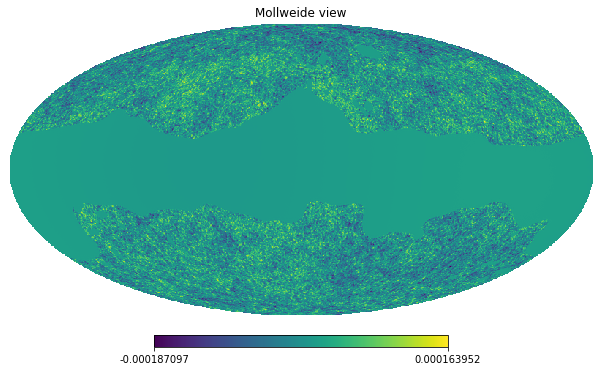

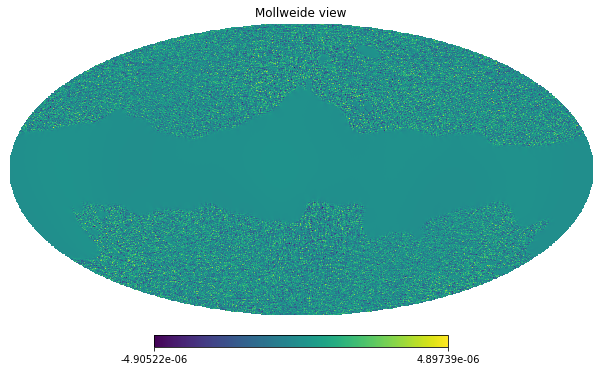

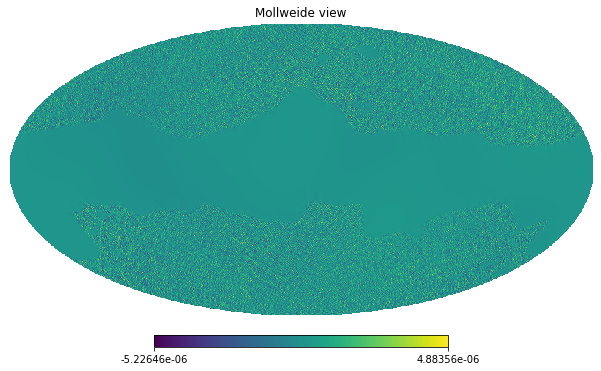

In [31]:
hp.mollview(Tmap)
hp.mollview(Qmap)
hp.mollview(Umap)

In [43]:
TT = cs.utils.alm2cl(2048,Talm)
EE = cs.utils.alm2cl(2048,Ealm)
BB = cs.utils.alm2cl(2048,Balm)
tt = cs.utils.alm2cl(2048,talm)
ee = cs.utils.alm2cl(2048,ealm)
bb = cs.utils.alm2cl(2048,balm)

In [44]:
xT = cs.utils.alm2cl(2048,tilm,Talm)
xE = cs.utils.alm2cl(2048,eilm,Ealm)
xB = cs.utils.alm2cl(2048,bilm,Balm)
xt = cs.utils.alm2cl(2048,tilm,talm)
xe = cs.utils.alm2cl(2048,eilm,ealm)
xb = cs.utils.alm2cl(2048,bilm,balm)

In [45]:
it = cs.utils.alm2cl(2048,tilm)
ie = cs.utils.alm2cl(2048,eilm)
ib = cs.utils.alm2cl(2048,bilm)

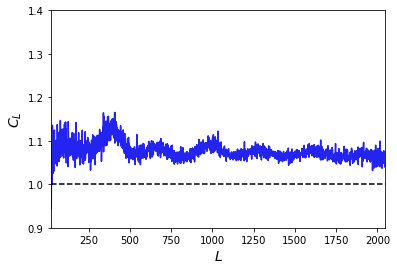

In [76]:
pl.plot_1dstyle(ymin=.9,ymax=1.4)
rhoT2 = xT/np.sqrt(TT*it)
rhot2 = xt/np.sqrt(tt*it)
plot(rhoT2/rhot2)
axhline(1.,color='k',ls='--')

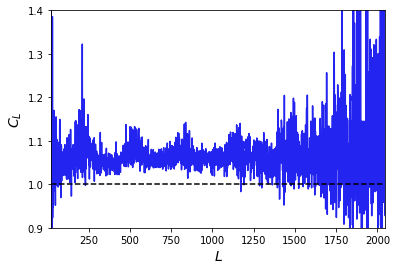

In [75]:
pl.plot_1dstyle(ymin=.9,ymax=1.4)
rhoE2 = xE/np.sqrt(EE*ie)
rhoe2 = xe/np.sqrt(ee*ie)
plot(rhoE2/rhoe2)
axhline(1.,color='k',ls='--')

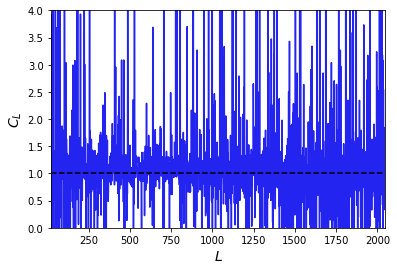

In [72]:
pl.plot_1dstyle(ymin=0.,ymax=4.)
rhoB2 = xB/np.sqrt(BB*ib)
rhob2 = xb/np.sqrt(bb*ib)
plot(rhoB2/rhob2)
axhline(1.,color='k',ls='--')